<a href="https://colab.research.google.com/github/lindaperez/2024_KaggleGettingStarted/blob/main/Titanic2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of the analysis is to predict who is going to survive and who is not based on the variables about the tripulants of a ship named Titanic.

- Is there any relationship betweeen age and another variable like class
- Is there anyt relationship with cabin and another variable
- is there any association between the class,name, ticket fair, embarked, etc and the likelyhood of surving

Data Preprocessing

Exploratory Data Analysis

In [116]:
#imports
import pandas as pd # Manipulation Analysis and Exploration
from IPython.display import display # Display the data
from sklearn.preprocessing import LabelEncoder #Change categorical variables into numerical variables
import matplotlib.pyplot as plt  #visualizations
from google.colab import drive #Google drive mounting
import numpy as np
from collections import defaultdict
#paths

# Replace 'your_file.csv' with the path to your CSV file
train_path = '/content/drive/MyDrive/train.csv'
test_path = '/content/drive/MyDrive/test.csv'

0.- Upload Data into Google Colab Mounting Google Drive.

In [117]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.- Overview of the Data

In [118]:
# Read the CSV file into a DataFrame
raw_train_df = pd.read_csv(train_path)

# Display the DataFrame as a table
display(raw_train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [119]:
# Print the shape
print("Number of rows:", raw_train_df.shape[0])
print("Number of columns:", raw_train_df.shape[1])


Number of rows: 891
Number of columns: 12


* Lets check the data type of each column:

In [120]:
# Check the data types of each column
data_types = raw_train_df.dtypes

# Print the data types of each column
print("Data types of each column:")
print(data_types)

Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Notes:
- Generate statistics about survivors, pclasses , sex, gender
- Ticket contains weird data do I have to separate numbers from letters?
- Outliers: SibSp, PArch

2.- Checking for Missing Values
- Nulls/Empty
- NAs

In [121]:
# Identify missing values
missing_values = raw_train_df.isnull().sum()
# Find the count of missing values (NaNs) in each column
missing_values_per_column = raw_train_df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

# Print the count of missing values (NaNs) in each column
print("Missing values (NaNs) in each column:")
print(missing_values_per_column)

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values (NaNs) in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Notes:
- Age 20% Nulls
- Cabin 80% Nulls

### Univariate Analysis

Variables of Interests:
- No. PassengerId       int64   Discrete
- Target. Survived      int64.  Cat - Binary
- Yes. Pclass           int64.  Cat - Ordinal
- Yes. Name            object.  Cat - Nominal
- Yes. Sex             object.  Cat - Nominal
- Yes. Age            float64.  Num - Continuous
- Yes. SibSp            int64.  Num - Discrete
- Yes. Parch            int64.  Num - Discrete
- Yes. Ticket          object.  Cat - Nominal
- Yes. Fare           float64.  Num - Continuous
- Yes. Cabin           object.  Cat - Nominal
- Yes. Embarked        object.  Cat - Nominal

1.- Central Tendency, Dispersion and Shape for numerical variables.

In [122]:
# Specify the numerical variables you want to include
numerical_variables = [ 'Age','SibSp','Parch','Fare']

# Calculate summary statistics for specific numerical variables
summary_statistics_specific = raw_train_df[numerical_variables].describe()

# Print the summary statistics for specific numerical variables
print(summary_statistics_specific)


              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


* **Ages**:  There are 714 non-null observation which represent the 80%. The mean of ages is around 29.7 years old. The youngest passager is 0.42 (infant), the oldest passager is 80 years old. The median age (50% percentile) is 28 years meaning that half of the passengers are younger than 28 years and half are older. The interquartile range (IQR) is approximately 18.9 years, indicating that half of the individuals are between approximately 20.1 years and 38 years old. And 97% of the observations are between 0-60 years.

* **Siblings and Sposes (SibSp)** The dataset defines family relations {Sibling : brother, sister, stepbrother, stepsister, Spouse : husband, wife (mistresses and fiancés were ignored}. 100% of the observations are present with an average of 0.52 siblings/sposes aboard. The maximun number of sibling/spose aboard for a passenger is 8. 50% of the passangers does not have any sibling/spose aboard and 75% of the passengers travel with one spose/sibling aboard. 97% of the passengers are between 0-3 sposes/siblings.A potential left skewed distribution since the variability is high.

* **Parents and Children (Parch):** there are also 891 non-null observations, with an average of approximately 0.38 parents/children aboard. The maximum number of parents/children aboard for a passenger is 6. 75% of the passengers does not have any parents/children aboard. 97% of the passengers are between 0-1.92 sposes/siblings.A potential left skewed distribution since the variability is high.

* **Passenger Fare:** 100% observations are present, with an average fare of approximately 32.20. The fare varies widely, ranging from 0 to 512.33, with the median fare being 14.45. The average fare paid by passengers is approximately $32.20, with a standard deviation of approximately $49.69, indicating significant variability in fare prices. The minimum fare is $0.00, indicating that some passengers may have traveled for free or received complementary tickets. The maximum fare is $512.33, suggesting that some passengers paid significantly more for premium accommodations or special services. 75% of the passengers pay less than 31 for each ticket. A potential left skewed distribution the spread of the data is wide.


1.1.- Central Tendency, Dispersion and Shape Visualization

* Histogram: Displays the distribution of values.
* Box plot: Illustrates the central tendency, variability, and potential outliers.
* Density plot: Shows the probability density of the data over a continuous interval.
* QQ plot: Compares the distribution of the data to a theoretical distribution (e.g., normal distribution).

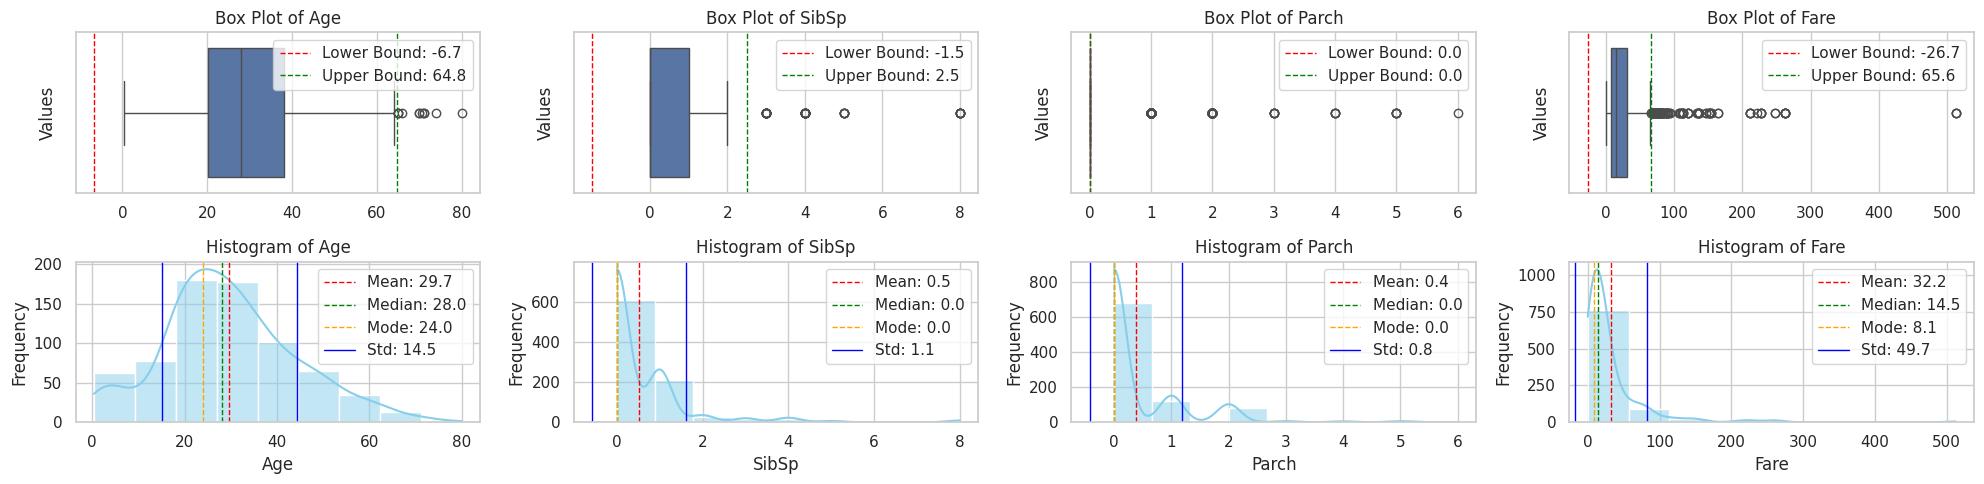

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables
numerical_variables = ['Age', 'SibSp', 'Parch', 'Fare']

# Create a figure with a subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 5))

# Iterate over each numerical variable
for i, column in enumerate(numerical_variables):
    numeric_values = pd.to_numeric(raw_train_df[column], errors='coerce').dropna()

     # Calculate lower bound and upper bound
    Q1 = numeric_values.quantile(0.25)
    Q3 = numeric_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add box plot to the subplot in the first row
    sns.boxplot(x=raw_train_df[column], ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of {column}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Values')

    # Plot vertical lines for lower bound and upper bound
    axes[0, i].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {lower_bound:.1f}')
    axes[0, i].axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {upper_bound:.1f}')

    # Add legend to the box plot
    axes[0, i].legend()

    # Add histogram with distribution plot to the subplot in the second row
    sns.histplot(raw_train_df[column], kde=True, color='skyblue', bins=9, ax=axes[1, i])
    axes[1, i].set_title(f'Histogram of {column}')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Frequency')

    # Calculate mean, median, mode, and standard deviation
    mean_ = raw_train_df[column].mean()
    median_ = raw_train_df[column].median()
    mode_ = raw_train_df[column].mode().values[0]
    std_ = raw_train_df[column].std()

    # Plot vertical lines for mean, median, mode, and standard deviation on the histogram subplot
    axes[1, i].axvline(mean_, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_:.1f}')
    axes[1, i].axvline(median_, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_:.1f}')
    axes[1, i].axvline(mode_, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_:.1f}')
    axes[1, i].axvline(mean_ + std_, color='blue', linestyle='solid', linewidth=1, label=f'Std: {std_:.1f}')
    axes[1, i].axvline(mean_ - std_, color='blue', linestyle='solid', linewidth=1)

    # Add legend to the histogram subplot
    axes[1, i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


* **Ages**:  The distribution appears slightly right-skewed, as the tail extends more to the right, but the skewness is relatively small.
The kurtosis value suggests that the distribution has moderate tails compared to a normal distribution, indicating some outliers or heavier tails.There are some outliers with values above 65 older than the majority of passengers.

* **Siblings and Sposes (SibSp)** The distribution is positively skewed with a long tail towards higher values.The presence of positive skewness suggests that there were relatively few passengers with a larger number of siblings/spouses which families traveling together. Additionally, there are some outliers with values above 2, which represent individuals with a larger number of siblings/spouses than the majority of passengers.

* **Parents and Children (Parch):** The distribution positively skewed with a long tail towards higher values.The presence of positive skewness suggests that there were relatively few passengers with a larger number of parents/children, potentially indicating families traveling together. The range of the variable spans from 0 to 6, with an interquartile range of 0 to 0, indicating that most passengers had few or no parents/children aboard. Additionally, there are some outliers with values above 2, which represent individuals with a larger number of parents/children than the majority of passengers."

* **Passenger Fare:** The distribution has Positive skewness, a longer tail to the right towards higher values. The distribution of fares is likely positively skewed, as indicated by the difference between the mean ($32.20) and the median ($14.45). A positive skew suggests that there are relatively few passengers who paid very high fares, which pull the mean upwards, resulting in a higher mean than median.

2.- Frequencies and proporsion for categoricals
* Survived
* Pclass
* Sex
* Embarked
* Cabin
* Ticket

In [124]:
results = pd.DataFrame()

# Iterate over each column in the DataFrame
for column in raw_train_df.columns:
    if column not in numerical_variables and column not in {'PassengerId','Name','Ticket', 'Cabin'}:

      # Calculate frequencies and proportions for the column
      frequencies = raw_train_df[column].value_counts()
      proportions = raw_train_df[column].value_counts(normalize=True)

      # Concatenate frequencies and proportions into a single DataFrame
      result = pd.concat([frequencies, proportions], axis=1)
      result.columns = ['Frequency', 'Proportion']

      # Add a column for the column name
      result['Column'] = column

      # Reset the index to make categories as a column
      result.reset_index(inplace=True)
      result.rename(columns={'index': 'Category'}, inplace=True)

      # Append the results to the main DataFrame
      results = pd.concat([results, result], ignore_index=True)

# Display the results DataFrame
display(results)

,Category,Frequency,Proportion,Column
0,0,549,0.616162,Survived
1,1,342,0.383838,Survived
2,3,491,0.551066,Pclass
3,1,216,0.242424,Pclass
4,2,184,0.206510,Pclass
5,male,577,0.647587,Sex
6,female,314,0.352413,Sex
7,S,644,0.724409,Embarked
8,C,168,0.188976,Embarked
9,Q,77,0.086614,Embarked


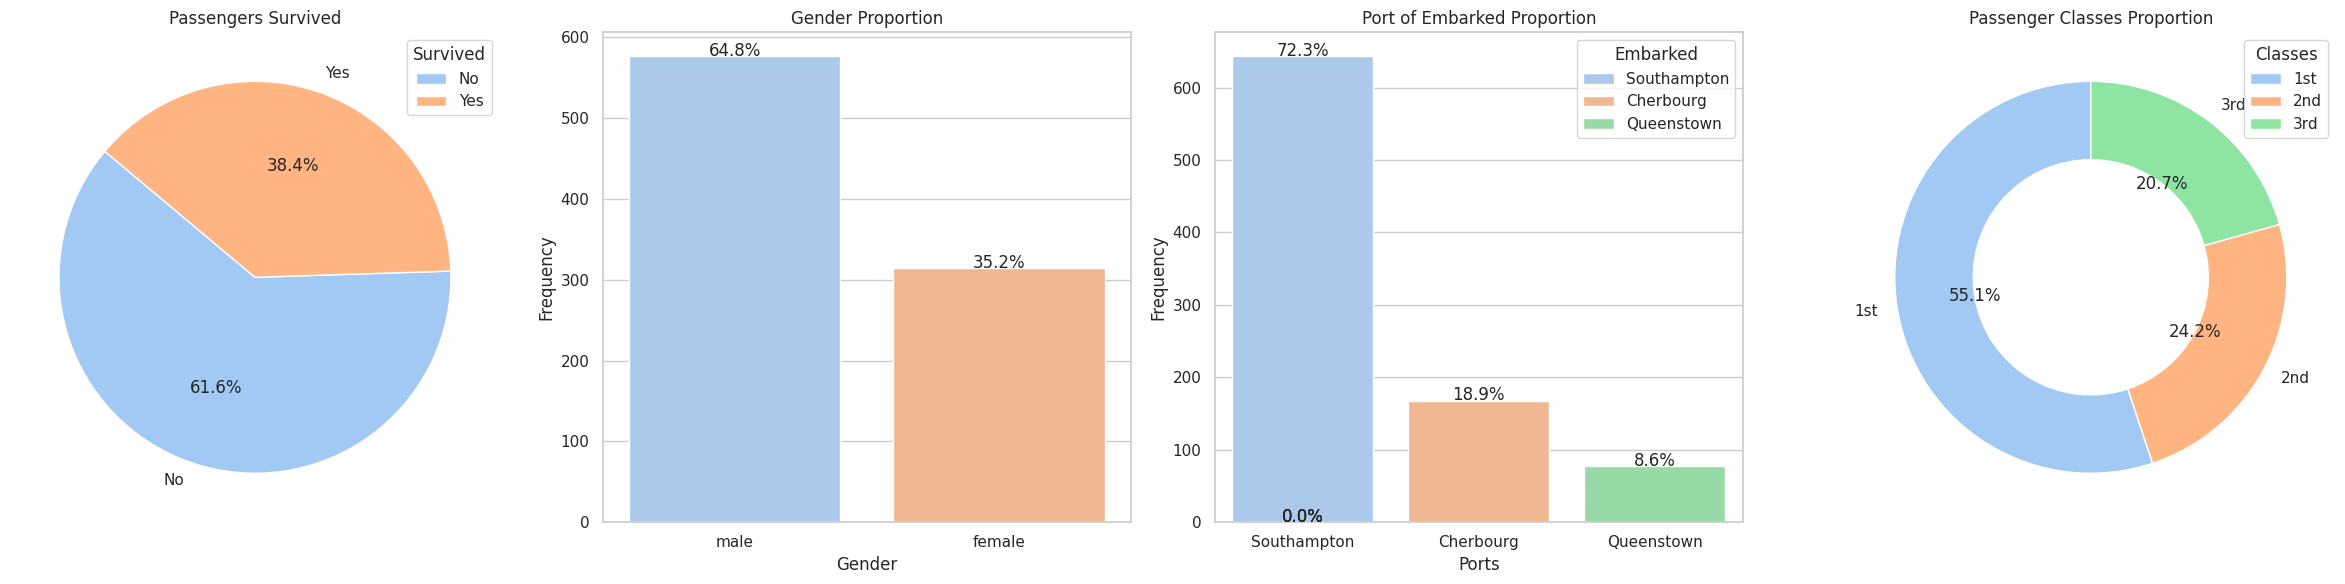

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Adjusted figsize to fit all plots in one row

# Define color palette
colors = sns.color_palette('pastel')

# Pie Chart for 'Survived'
category_counts_survived = raw_train_df['Survived'].value_counts()
axes[0].pie(category_counts_survived, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Passengers Survived')
axes[0].legend(title='Survived', loc='upper right')

# Bar Plot for 'Sex'
sns.countplot(data=raw_train_df, x='Sex', hue='Sex', ax=axes[1], palette='pastel', legend=False)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Gender Proportion')
total = len(raw_train_df['Sex'])
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.1f}%'.format((height / total) * 100), ha="center")

# Change 'Embarked' labels
raw_train_df['Embarked'] = raw_train_df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Count Plot for 'Embarked'
sns.countplot(data=raw_train_df, x='Embarked', hue='Embarked', ax=axes[2], palette='pastel', legend=True)
axes[2].set_xlabel('Ports')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Port of Embarked Proportion')
total = len(raw_train_df['Embarked'])
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.1f}%'.format((height / total) * 100), ha="center")

# Donut Chart for 'Pclass'
category_counts_pclass = raw_train_df['Pclass'].value_counts()
axes[3].pie(category_counts_pclass, labels=['1st', '2nd', '3rd'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
axes[3].set_title('Passenger Classes Proportion')

# Create custom legend for 'Pclass' donut chart
axes[3].legend(title='Classes', loc='upper right', labels=['1st', '2nd', '3rd'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


* Survived: 38% of the passengers in the dataset survived the Titanic disaster, while 62% did not. This indicates that a larger proportion of passengers did not survive compared to those who survived.

* Gender: 65% of the passengers in the dataset are male, while 35% are female.
This suggests that there are more male passengers compared to female passengers in the dataset.

* Port of Embark: 72% of the passengers in the dataset embarked from Southampton, 19% from Cherbourg, and 9% for Queenstown.
This suggests that there are more passengers that embarked from Southampton than from Cherbourg or Queentown.

In [126]:
raw_train_df.fillna('Unknown', inplace=True)

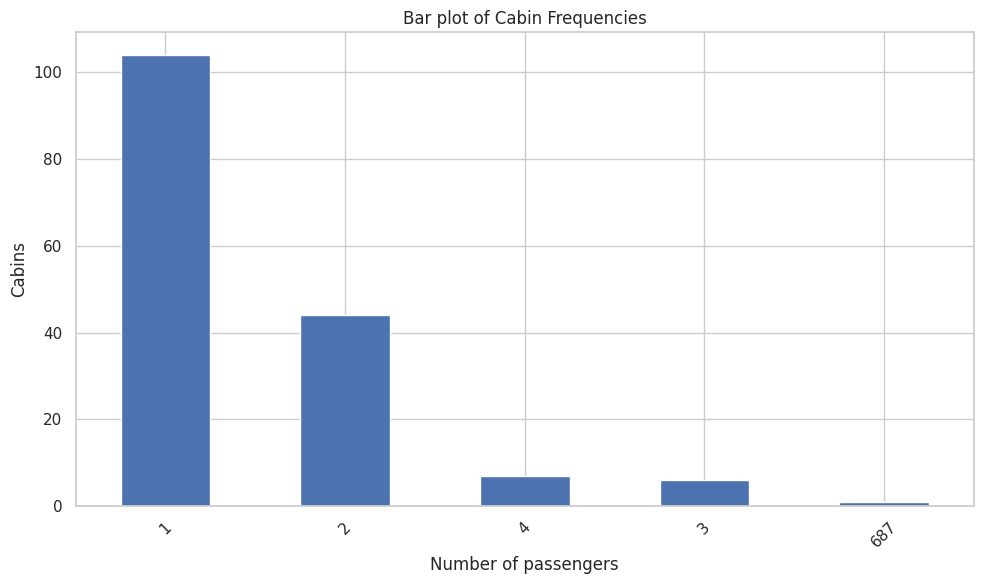

In [127]:
from collections import defaultdict
raw_train_df['Cabin'] = raw_train_df['Cabin'].astype(str)
# Initialize an empty dictionary to store token frequencies
token_freq = defaultdict(int)

# Iterate over each value in the column
for value in raw_train_df['Cabin']:
    # Split the value by space
      tokens = value.split()
      # Count the frequency of each token
      for token in tokens:
          token_freq[token] = token_freq.get(token, 0) + 1

# Convert the dictionary to a set
token_set = set(token_freq.items())
# Assuming df is your DataFrame and 'cabin' is the column containing token frequencies
token_freq_series = pd.Series(token_freq)
cabin_token_freq = token_freq_series.value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
cabin_token_freq.plot(kind='bar')
plt.xlabel('Number of passengers')
plt.ylabel('Cabins')
plt.title('Bar plot of Cabin Frequencies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


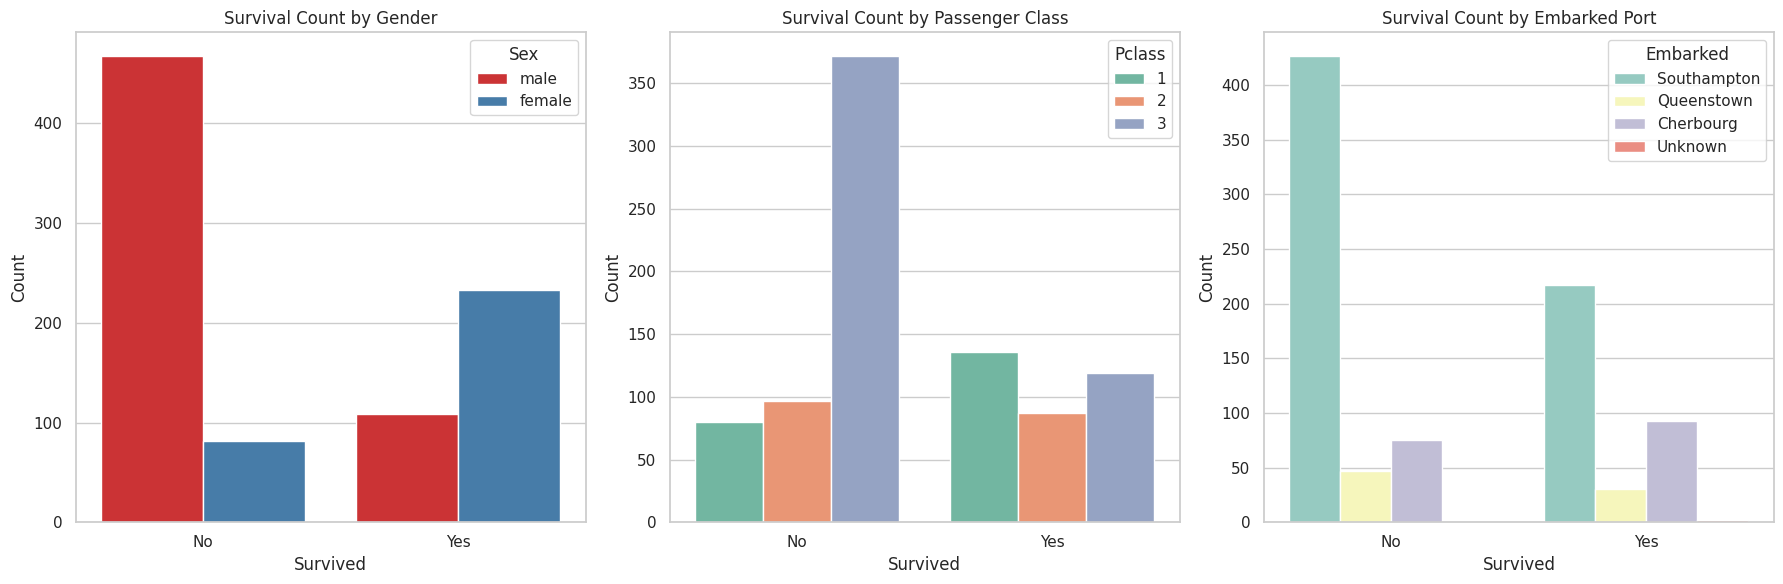

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for survival count by gender
sns.countplot(data=raw_train_df, x='Survived', hue='Sex', palette='Set1', ax=axes[0])
axes[0].set_title('Survival Count by Gender')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].legend(title='Sex')

# Plot for survival count by passenger class
sns.countplot(data=raw_train_df, x='Survived', hue='Pclass', palette='Set2', ax=axes[1])
axes[1].set_title('Survival Count by Passenger Class')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].legend(title='Pclass')

# Plot for survival count by embarked port
sns.countplot(data=raw_train_df, x='Survived', hue='Embarked', palette='Set3', ax=axes[2])
axes[2].set_title('Survival Count by Embarked Port')
axes[2].set_xlabel('Survived')
axes[2].set_ylabel('Count')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['No', 'Yes'])
axes[2].legend(title='Embarked')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


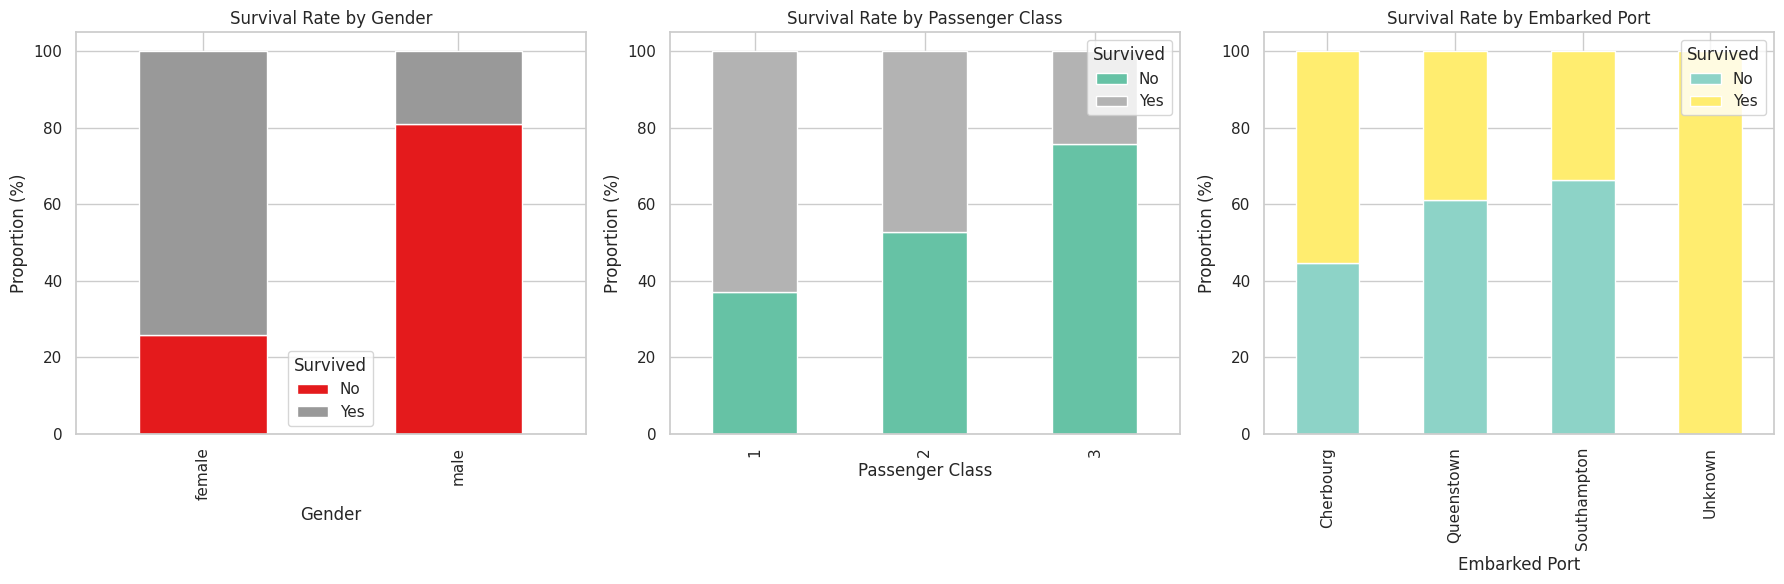

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mapping for survival labels
survival_mapping = {0: 'No', 1: 'Yes'}

# Map survival labels in the DataFrame
raw_train_df['Survived'] = raw_train_df['Survived'].map(survival_mapping)

# Calculate survival rates by gender
survival_rate_gender = raw_train_df.groupby(['Sex', 'Survived']).size().unstack()
survival_rate_gender = survival_rate_gender.div(survival_rate_gender.sum(axis=1), axis=0) * 100

# Calculate survival rates by passenger class
survival_rate_class = raw_train_df.groupby(['Pclass', 'Survived']).size().unstack()
survival_rate_class = survival_rate_class.div(survival_rate_class.sum(axis=1), axis=0) * 100

# Calculate survival rates by embarked port
survival_rate_embarked = raw_train_df.groupby(['Embarked', 'Survived']).size().unstack()
survival_rate_embarked = survival_rate_embarked.div(survival_rate_embarked.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot survival rates by gender
survival_rate_gender.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set1')
axes[0].set_title('Survival Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion (%)')

# Plot survival rates by passenger class
survival_rate_class.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set2')
axes[1].set_title('Survival Rate by Passenger Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Proportion (%)')

# Plot survival rates by embarked port
survival_rate_embarked.plot(kind='bar', stacked=True, ax=axes[2], colormap='Set3')
axes[2].set_title('Survival Rate by Embarked Port')
axes[2].set_xlabel('Embarked Port')
axes[2].set_ylabel('Proportion (%)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [130]:
import pandas as pd

# Split the 'Cabin' values by space and calculate the number of cabins
raw_train_df['Cabin'] = raw_train_df['Cabin'].replace('Unknown','')
raw_train_df['NumCabins'] = raw_train_df['Cabin'].apply(lambda x: len(str(x).split()))
display(raw_train_df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumCabins
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,Southampton,0
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,Southampton,0
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,1
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,Southampton,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,,Southampton,0
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton,1
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Unknown,1,2,W./C. 6607,23.4500,,Southampton,0
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg,1


3.- Lets perform some transformations
- Remove the Passager ID
- Remove Name
- Remove the Cavin

In [131]:
columns_to_remove=['PassengerId','Name','Cabin']
train_df= raw_train_df.drop(columns_to_remove,axis=1)

- Sex: Male:1 Female = 0
- Embarked

In [132]:
# Define a mapping from categories to numerical values
sex_mapping = {'male': 1, 'female': 0}

# Replace categorical variable with numerical values
if 'Sex' in train_df.columns:
  train_df['sex'] = train_df['Sex'].replace(sex_mapping)
  train_df.drop(['Sex'],axis=1,inplace=True)
  train_df.rename(columns={'sex': 'Sex'}, inplace=True)